In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [50]:
data = pd.read_csv('Life Expectancy Data (1).csv')

In [51]:
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


## The data-set aims to answer the following key questions

#Does various predicting factors which has been chosen initially really affect the Life expectancy?

#What are the predicting variables actually affecting the life expectancy?

#Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?

#How does Infant and Adult mortality rates affect life expectancy?

#Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.

#What is the impact of schooling on the lifespan of humans?

#Does Life Expectancy have positive or negative relationship with drinking alcohol?

#Do densely populated countries tend to have lower life expectancy?

#What is the impact of Immunization coverage on life Expectancy?

## 1. From unnumerical data to numerical 
We have 2 columns wit non numerical data : 'status' and 'Country'. We would like to convert into int

In [52]:
num_data_st, meta_data_st = pd.factorize(data['Status'])
num_data_c, meta_data_c = pd.factorize(data['Country'])

In [53]:
data['Stat'] = num_data_st
data['Count'] = num_data_c

In [54]:
dat = data.drop(['Country'], axis = 1)
dat = dat.drop(['Status'], axis = 1)
dat.describe()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Stat,Count
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,...,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,...,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,0.174268,95.091219
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,...,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920,0.379405,56.250042
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,...,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,...,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000,0.000000,46.000000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,...,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,0.000000,93.000000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,...,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000,0.000000,145.000000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,...,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,1.000000,192.000000


## 2. Missing data

<AxesSubplot:>

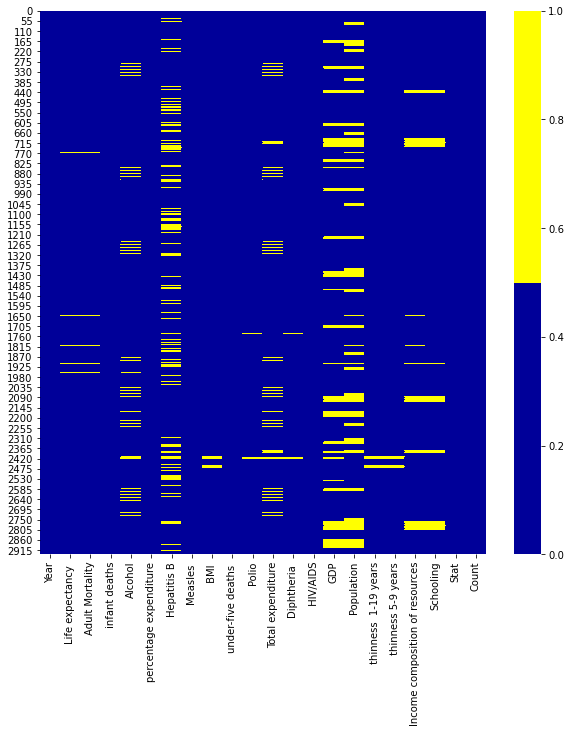

In [55]:
fig, ax = plt.subplots(figsize=(10,10)) 
c = dat.columns
#col = dat.columns[:20] # first 20 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(dat[c].isnull(), cmap=sns.color_palette(colours))

In [56]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in dat.columns:
    pct_missing = np.mean(dat[col].isnull())
    print('{} - {}%'.format(col, (pct_missing*100)))

Year - 0.0%
Life expectancy  - 0.3403675970047651%
Adult Mortality - 0.3403675970047651%
infant deaths - 0.0%
Alcohol - 6.603131381892443%
percentage expenditure - 0.0%
Hepatitis B - 18.82232811436351%
Measles  - 0.0%
 BMI  - 1.1572498298162015%
under-five deaths  - 0.0%
Polio - 0.6466984343090538%
Total expenditure - 7.6923076923076925%
Diphtheria  - 0.6466984343090538%
 HIV/AIDS - 0.0%
GDP - 15.248468345813478%
Population - 22.19196732471069%
 thinness  1-19 years - 1.1572498298162015%
 thinness 5-9 years - 1.1572498298162015%
Income composition of resources - 5.684138869979578%
Schooling - 5.547991831177672%
Stat - 0.0%
Count - 0.0%


In [57]:
# impute the missing values and create the missing value indicator variables for each numeric column.
dat_numeric = dat.select_dtypes(include=[np.number])
numeric_cols = dat_numeric.columns.values


for col in numeric_cols:
        med = dat[col].median()
        dat[col] = dat[col].fillna(med)

In [58]:

dat.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Stat,Count
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.381178,42.035739,...,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837,0.174268,95.091219
std,4.613841,9.509115,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.935375,160.445548,...,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139,0.379405,56.250042
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,...,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,...,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000,0.000000,46.000000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,...,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,0.000000,93.000000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,...,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000,0.000000,145.000000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,...,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,1.000000,192.000000


In [59]:
for col in dat.columns:
    pct_missing = np.mean(dat[col].isnull())
    print('{} - {}%'.format(col, (pct_missing*100)))

Year - 0.0%
Life expectancy  - 0.0%
Adult Mortality - 0.0%
infant deaths - 0.0%
Alcohol - 0.0%
percentage expenditure - 0.0%
Hepatitis B - 0.0%
Measles  - 0.0%
 BMI  - 0.0%
under-five deaths  - 0.0%
Polio - 0.0%
Total expenditure - 0.0%
Diphtheria  - 0.0%
 HIV/AIDS - 0.0%
GDP - 0.0%
Population - 0.0%
 thinness  1-19 years - 0.0%
 thinness 5-9 years - 0.0%
Income composition of resources - 0.0%
Schooling - 0.0%
Stat - 0.0%
Count - 0.0%


## 3. Outliers

In [60]:
dat.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Stat,Count
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.381178,42.035739,...,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837,0.174268,95.091219
std,4.613841,9.509115,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.935375,160.445548,...,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139,0.379405,56.250042
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,...,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,...,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000,0.000000,46.000000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,...,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,0.000000,93.000000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,...,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000,0.000000,145.000000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,...,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,1.000000,192.000000


### Does various predicting factors which has been chosen initially really affect the Life expectancy? + What are the predicting variables actually affecting the life expectancy?

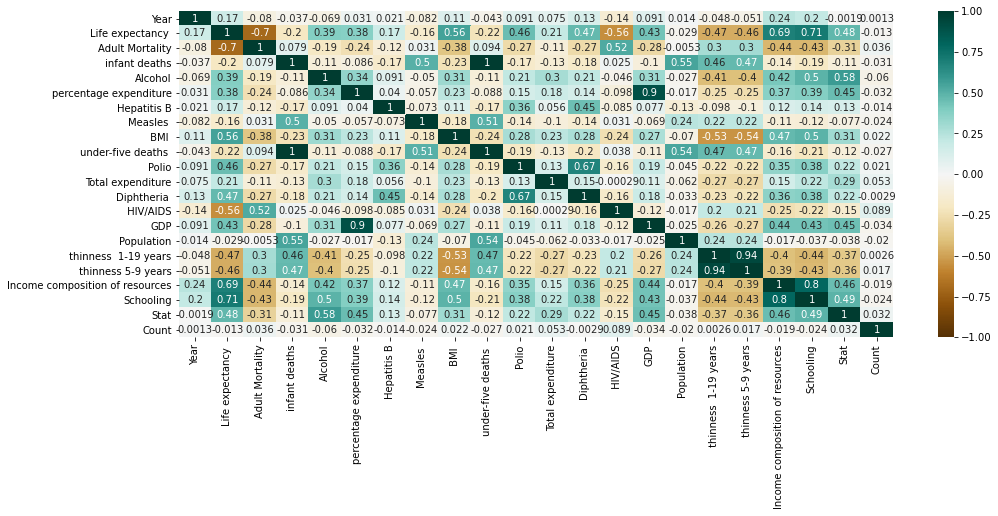

In [61]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dat.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

From the correlation map we con conclude, that Life expectancy is mostly affected by BMI, HIV, GDP, thinnes at young age, income, schooling, and status of country

## Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?

In [62]:
n = dat.groupby(by = ['Life expectancy ']).sum()
n


,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Stat,Count
Life expectancy,,,,,,,,,,,,,,,,,,,,,
36.3,2010,682.0,23,5.760,36.292918,92.0,0,44.2,58,66.0,...,66.0,1.9,662.279518,9999617.0,4.0,4.0,0.470,8.6,0,72
39.0,2000,533.0,29,3.970,20.395683,92.0,3575,17.2,48,46.0,...,44.0,1.2,139.314773,4564297.0,1.3,1.4,0.292,6.7,0,152
41.0,2001,519.0,30,4.210,33.346915,92.0,649,17.5,48,38.0,...,38.0,1.5,227.779471,4739147.0,1.1,1.2,0.302,7.0,0,152
41.5,2003,57.0,30,4.070,38.614732,92.0,586,18.4,47,66.0,...,73.0,1.9,263.761831,5199549.0,9.7,9.8,0.322,7.4,0,152
42.3,2004,496.0,30,3.990,38.524548,92.0,7,18.8,47,69.0,...,65.0,2.1,263.145817,5439695.0,9.5,9.5,0.332,7.6,0,152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85.0,24114,858.0,8,97.410,35991.382502,961.0,2663,560.0,9,1058.0,...,1142.0,1.2,241697.385040,68198739.0,9.3,8.8,10.637,198.9,8,1080
86.0,30156,1093.0,17,144.335,29818.358709,1295.0,6340,721.7,22,1430.0,...,1434.0,1.5,215383.619155,94519903.0,12.4,10.5,12.788,246.2,12,1486
87.0,18091,642.0,7,74.120,22249.077451,765.0,2214,469.2,9,859.0,...,861.0,0.9,165009.767290,54759175.0,10.0,8.6,7.446,137.6,6,911


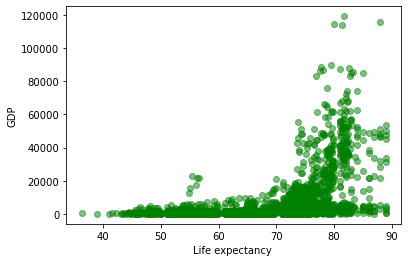

In [63]:
x = dat['Life expectancy ']
y = dat['GDP']

plt.scatter(x, y,  c="g", alpha=0.5)
plt.xlabel("Life expectancy ")
plt.ylabel("GDP")
plt.show()

## How does Infant and Adult mortality rates affect life expectancy?

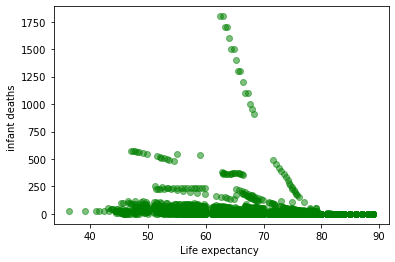

In [64]:
y = dat['infant deaths']
x = dat['Life expectancy ']

plt.scatter(x, y,  c="g", alpha=0.5)
plt.ylabel("infant deaths ")
plt.xlabel("Life expectancy ")
plt.show()

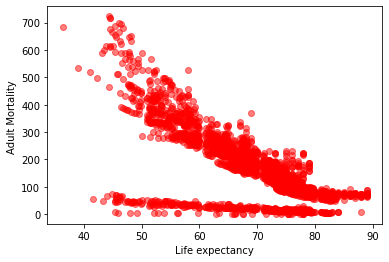

In [65]:

y = dat['Adult Mortality']
x = dat['Life expectancy ']

plt.scatter(x, y,  c="r", alpha=0.5)
plt.ylabel("Adult Mortality ")
plt.xlabel("Life expectancy")
plt.show()

## Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.

In [66]:
dat

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Stat,Count
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,0
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,0
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,0
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,192
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,192
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0,192
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,192


## Linear Regression 

In [67]:
dt = dat.values # to convert from df to np
scaler = MinMaxScaler()
dt = scaler.fit_transform(dt)
X = dt[:, 2:]
y = dt[:, 1]
m = y.size

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

In [69]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)


print('Coefficients: \n', lin_reg.coef_)


Coefficients: 
 [-0.27388001  3.43960359  0.02014155  0.00988081 -0.02898635 -0.09141005
  0.07896171 -3.58647539  0.05689492  0.03941057  0.07249931 -0.43629173
  0.10574277  0.01731543 -0.05028313  0.01509199  0.10809928  0.22331883
  0.02848436  0.01732463]


In [73]:
def print_(y_train, y_pred_train, y_test, y_pred_test):
    print('sklearn model:')
    print('Absolute error for train set', (metrics.mean_absolute_error(y_train, y_pred_train)))
    print('Absolute error for test set', (metrics.mean_absolute_error(y_test, y_pred_test)))
    print('-'*70)
    print('Squared  error for train set',(metrics.mean_squared_error(y_train, y_pred_train)))
    print('Squared  error for test set',(metrics.mean_squared_error(y_test, y_pred_test)))
    print('-'*70)
    print('Mean squared error for train set', (np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))))
    print('Mean squared error for test set', (np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))))
    print('-'*70)
    print('Coefficient of determination for train set:', metrics.r2_score(y_train, y_pred_train))
    print('Coefficient of determination for test set:', metrics.r2_score(y_test, y_pred_test))


    return


In [74]:
f = print_(y_train = y_train, y_pred_train =y_pred_train, y_test = y_test, y_pred_test = y_pred_test )

sklearn model:
Absolute error for train set 0.05726752183957141
Absolute error for test set 0.05703085290189116
----------------------------------------------------------------------
Squared  error for train set 0.005886456982956108
Squared  error for test set 0.005807620862946217
----------------------------------------------------------------------
Mean squared error for train set 0.07672324929873674
Mean squared error for test set 0.07620774805061634
----------------------------------------------------------------------
Coefficient of determination for train set: 0.8168212732448593
Coefficient of determination for test set: 0.8279138735909877


In [75]:
# Random Forest Classifier